In [1]:
import keras
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('length:', len(text))

length: 600901


In [2]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))

# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

# Next, one-hot encode the characters into binary arrays.
print('Vectorization......')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 200281
Unique characters: 59
Vectorization......


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [3]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [4]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [5]:
import random
import sys

random.seed(42)
start_index = random.randint(0, len(text) - maxlen - 1)

for epoch in range(1, 10):
    print('Epoch', epoch)
    model.fit(x, y, batch_size=32, epochs=1)

    seed_text = text[start_index: start_index + maxlen]
    print('--- Seed Text: "' + seed_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ Temperature:', temperature)
        generated_text = seed_text
        sys.stdout.write(generated_text)

        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
                
            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

Epoch 1
Train on 200281 samples
200281/200281 [==============================] - 200s 1ms/sample - loss: 1.9370
--- Seed Text: "the slowly ascending ranks and classes, in which,
through fo"
------ Temperature: 0.2
the slowly ascending ranks and classes, in which,
through for the said, and th

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


e such a man of the such a man the such a master to the provess, and the as the such a man in the such a man to the such a such the suffering of the promosed and its all to the instine to the faith a man to the promally of the provess of the such a still to the such a man in the said to the provess, and the such a sufferent is the as the such a man in the same of the fast as the 
------ Temperature: 0.5
the slowly ascending ranks and classes, in which,
through for the as the belient to the provess, and of for one does of the greates to the looging their irsting to the life to the such
daimstenters, man and is is all of the as the instinctions as as the we a underent man and to man itself of the mastard of ourinds of the promosed longer to from all to their roce as the perhepses allove and every the "main to they dear as a courle
provess, of the lime. ther
------ Temperature: 1.0
the slowly ascending ranks and classes, in which,
through for of are toout which lest themehual to almostmi"

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


 of have the strong the indistrustwenil and were there is the properal called the standing before the conditions, and lifeacle had we part and the clue would are
early the desires the the really and first that of discordinate sti
------ Temperature: 1.0
the slowly ascending ranks and classes, in which,
through foundism of it are those when man
instrual now be salcftine logied and sagcation thre alred sympathy." of the special unitured of of callent to may of badagarige, in shose, good happines anreoueod,
the problem be reservt the igredi compude personal become to whom will lerously specty of sacrifror estahnes to valled every a mly uncostss in swave to whence of synthilgament to the pleasenoounance for h
------ Temperature: 1.2
the slowly ascending ranks and classes, in which,
through fouls, ickearophily. he also oved
honeraply agderate able, always hericuage,
for a premiming.
.heanful for geral either he things amne loaked untilitary, afforous aliarced and thir weaking
peatians yeap


In [6]:
# -----------------------------------------GRU

In [7]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus Size:', len(text))

maxlen = 60

step = 3

sentences = []

next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of Sequence:', len(sentences))

chars = sorted(list(set(text)))
print('Number of Unique Charactors:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

from keras import layers

model = keras.models.Sequential()
model.add(layers.GRU(256, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

import random
import sys

random.seed(42)
start_index = random.randint(0, len(text) - maxlen - 1)

for epoch in range(1, 61):
    print('Epoch', epoch)
    model.fit(x, y, batch_size=128, epochs=1)

    seed_text = text[start_index: start_index + maxlen]
    print('--- Seed Text: "' + seed_text + '"')

    if epoch % 10 == 0 or epoch == 1:
      for temperature in [0.2, 0.5, 1.0, 1.2]:
          print('------ Temperature:', temperature)
          generated_text = seed_text
          sys.stdout.write(generated_text)

          for i in range(400):
              sampled = np.zeros((1, maxlen, len(chars)))
              for t, char in enumerate(generated_text):
                  sampled[0, t, char_indices[char]] = 1.

              preds = model.predict(sampled, verbose=0)[0]
              next_index = sample(preds, temperature)
              next_char = chars[next_index]

              generated_text += next_char
              generated_text = generated_text[1:]

              sys.stdout.write(next_char)
              sys.stdout.flush()
          print()

Corpus Size: 600901
Number of Sequence: 200281
Number of Unique Charactors: 59
Vectorization...


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 1
Train on 200281 samples
200281/200281 [==============================] - 208s 1ms/sample - loss: 1.9604
--- Seed Text: "the slowly ascending ranks and classes, in which,
through fo"
------ Temperature: 0.2
the slowly ascending ranks and classes, in which,
through for such a self-conscious what the say not be and self-consequentions of the spirit only and some
has not which the elself which so the such a self-consion of the say
some a self-conscious only only and some the consequention of the most only
sympathy and seluss what the sperit and sympathy and some the self conscions and some
has some and some and some of the works of the spirit a some and some
has
------ Temperature: 0.5
the slowly ascending ranks and classes, in which,
through for conscious souls and sympathy and such such present
and still some all the say so threm and say, the consequiness of
"ye and something moderntial elsentiment and as a say and spirit where has so
the sastem the consider and many the say disc

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


the the boug the bont the or be bobe boug the mouch cathand abe jucat boug the bound bjughat of hat buat bo buat the that of buat bo buat the of be boucat boucabthe buchat bo buche bo bat of but arat buthat bous: at on the the boug boug bo be bur hat bes thes the the thathe boug thecct boug bougg bad abe'g the the ong coublothat at at bouathatuat be boug be buat of bo boug the
------ Temperature: 0.5
the slowly ascending ranks and classes, in which,
through found the de t as bat and ast ang t bucaught of houg hausthe (the math the buak bog bat uasct cag thoun at bobuthe bsou bathere boug that thand bos
atuat and and the mat it grand mayceaccat baren and that ond the bothur arat the bes t of gatheatuatur the the be the oract at bof bo and th ghauthe be thant of burthes andacathe therat buatathough the th hathe bat bouch the dount at and bas at an and av
------ Temperature: 1.0
the slowly ascending ranks and classes, in which,
through fot batta ofrthct uh ard  al thbussistigat o noaimpho

In [8]:
#-------------------------GRU + Early stopping

In [9]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus Size:', len(text))

maxlen = 60

step = 3

sentences = []

next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of Sequence:', len(sentences))

chars = sorted(list(set(text)))
print('Unique Charactors:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

from keras import layers
from keras.callbacks import EarlyStopping

model = keras.models.Sequential()
model.add(layers.GRU(256, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

early_stopping = EarlyStopping(patience=1)

optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

import random
import sys

random.seed(42)
start_index = random.randint(0, len(text) - maxlen - 1)

for epoch in range(1, 61):
    print('Epoch', epoch)
    model.fit(x, y, batch_size=128, epochs=1,
              callbacks=[early_stopping])

    seed_text = text[start_index: start_index + maxlen]
    print('--- Seed Text: "' + seed_text + '"')

    if epoch % 10 == 0 or epoch == 1:
      for temperature in [0.2, 0.5, 1.0, 1.2]:
          print('------ Temperature:', temperature)
          generated_text = seed_text
          sys.stdout.write(generated_text)

          for i in range(400):
              sampled = np.zeros((1, maxlen, len(chars)))
              for t, char in enumerate(generated_text):
                  sampled[0, t, char_indices[char]] = 1.

              preds = model.predict(sampled, verbose=0)[0]
              next_index = sample(preds, temperature)
              next_char = chars[next_index]

              generated_text += next_char
              generated_text = generated_text[1:]

              sys.stdout.write(next_char)
              sys.stdout.flush()
          print()

print('Epoch', epoch)
for temperature in [0.2, 0.5, 1.0, 1.2]:
          print('------ Temperature:', temperature)
          generated_text = seed_text
          sys.stdout.write(generated_text)

          for i in range(400):
              sampled = np.zeros((1, maxlen, len(chars)))
              for t, char in enumerate(generated_text):
                  sampled[0, t, char_indices[char]] = 1.

              preds = model.predict(sampled, verbose=0)[0]
              next_index = sample(preds, temperature)
              next_char = chars[next_index]

              generated_text += next_char
              generated_text = generated_text[1:]

              sys.stdout.write(next_char)
              sys.stdout.flush()
          print()

Corpus Size: 600901
Number of Sequence: 200281
Unique Charactors: 59
Vectorization...


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 1
Train on 200281 samples
200281/200281 [==============================] - 176s 878us/sample - loss: 2.0827
--- Seed Text: "the slowly ascending ranks and classes, in which,
through fo"
------ Temperature: 0.2
the slowly ascending ranks and classes, in which,
through for this in the which in the ficts the acchical self-can
be the be in the incent in the be the relight to the be the be the
"the "in the "the "the "self" in the more this procest the be the
about the man which the be the be the be the will the be the
self-can the be the be the fict the be the abest the perhaps to the
"things" himself be in the existence of the in the existence
the be think the finds
------ Temperature: 0.5
the slowly ascending ranks and classes, in which,
through for the contempt which in thit the relight in the himself which
in the own mation and the man which is please that the asting
to this his thing that the man unitical which is the more to
the fection in the existing of the be it man for the m

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


owe toulllentong ongoong the) toulong ong). t) tout) tong ongond theng) t) the t) tong the the) woutound tong tored tong tontoungonoullonge tong ong toong the tond the whe the t) wot) tond whe toulond the the t) tong tongentongoong the toullond toullond the)touthe tomoullonge toutong) tonge the tong towhe tong tous onowhe toullllond mong ongoweng wong tong the t
------ Temperature: 0.5
the slowly ascending ranks and classes, in which,
through fowhe wouly
tow
theng to
towhererelothe whencousting) theroud whoulond moullo the ong the theng).


towhomowhengot goforenctong) loulf
tongong) thestond tong onghot).lon towore tong the ong the the onge the wof tongeong
ong)oungoondopot) thoullotowhelo
then,
ongoong). whondowondow
towherendont). thengoundedong wos) tongongond the)prolleereat): theng) wowelooood onof
toulll thengeve) dowher
ng gondow
------ Temperature: 1.0
the slowly ascending ranks and classes, in which,
through fond
ctthoentle myge whonexthent ound mod vollouangow
tntywho
wentof

In [10]:
#!pip uninstall tensorflow
#!pip3 install tensorflow-gpu==1.14.0
#!pip uninstall q keras
#!pip3 install keras==2.0.8
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

2.9.2
2.9.0


In [11]:
from keras_preprocessing.image import load_img, img_to_array

target_image_path = './jeju.jpeg'
style_reference_image_path = './mountain.jpg'

width, height = load_img(target_image_path).size
img_height = 400
img_width = int(width * img_height / height)

In [12]:
import numpy as np
from keras.applications import vgg19

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_image(x):
    # ImageNet의 평균 픽셀 값을 더합니다
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [13]:
from tensorflow.keras import backend as K

target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))

combination_image = K.placeholder((1, img_height, img_width, 3))

input_tensor = K.concatenate([target_image,
                              style_reference_image,
                              combination_image], axis=0)
model = vgg19.VGG19(input_tensor=input_tensor,
                    weights='imagenet',
                    include_top=False)
print('Model loading completed.')

Model loading completed.


In [14]:
def content_loss(base, combination):
    return K.sum(K.square(combination - base))

In [15]:
def gram_matrix(x):
    features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_height * img_width
    return K.sum(K.square(S - C)) / (4. * (channels ** 2) * (size ** 2))

In [16]:
def total_variation_loss(x):
    a = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, 1:, :img_width - 1, :])
    b = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, :img_height - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

In [17]:
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
content_layer = 'block5_conv2'
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']
total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss = loss + content_weight * content_loss(target_image_features,
                                      combination_features)
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(style_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)

In [18]:
grads = K.gradients(loss, combination_image)[0]

fetch_loss_and_grads = K.function([combination_image], [loss, grads])

# import tensorflow as tf
# with tf.GradientTape() as gtape:
#     grads = gtape.gradient(loss, combination_image)
# fetch_loss_and_grads = K.function([combination_image], [loss, grads])

class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        x = x.reshape((1, img_height, img_width, 3))
        outs = fetch_loss_and_grads([x])
        loss_value = outs[0]
        grad_values = outs[1].flatten().astype('float64')
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

In [19]:
from scipy.optimize import fmin_l_bfgs_b
import time
from keras_preprocessing import image

result_prefix = 'style_transfer_result'
iterations = 20


x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
    print('Iteration:', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                     fprime=evaluator.grads, maxfun=20)
    print('loss value:', min_val)
    img = x.copy().reshape((img_height, img_width, 3))
    img = deprocess_image(img)
    fname = result_prefix + '_at_iteration_%d.png' % i
    image.save_img(fname, img)
    end_time = time.time()
    print('Saved Image: ', fname)
    print('%d Iteration completed in : %ds' % (i, end_time - start_time))

Iteration: 0
loss value: 1880913900.0
Saved Image:  style_transfer_result_at_iteration_0.png
0 Iteration completed in : 129s
Iteration: 1
loss value: 788950900.0
Saved Image:  style_transfer_result_at_iteration_1.png
1 Iteration completed in : 124s
Iteration: 2
loss value: 547809800.0
Saved Image:  style_transfer_result_at_iteration_2.png
2 Iteration completed in : 124s
Iteration: 3
loss value: 415202080.0
Saved Image:  style_transfer_result_at_iteration_3.png
3 Iteration completed in : 123s
Iteration: 4
loss value: 333712350.0
Saved Image:  style_transfer_result_at_iteration_4.png
4 Iteration completed in : 122s
Iteration: 5
loss value: 279646080.0
Saved Image:  style_transfer_result_at_iteration_5.png
5 Iteration completed in : 123s
Iteration: 6
loss value: 245707730.0
Saved Image:  style_transfer_result_at_iteration_6.png
6 Iteration completed in : 122s
Iteration: 7
loss value: 217058720.0
Saved Image:  style_transfer_result_at_iteration_7.png
7 Iteration completed in : 122s
Iterati

In [20]:
from matplotlib import pyplot as plt

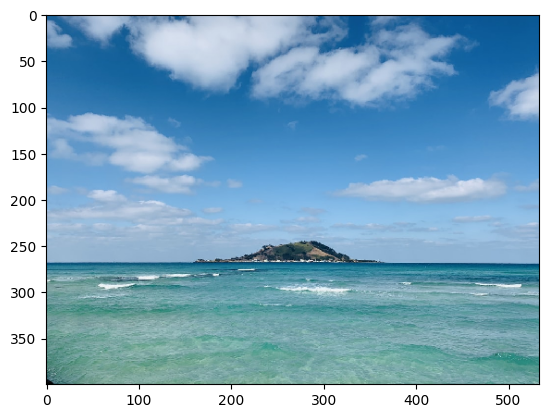

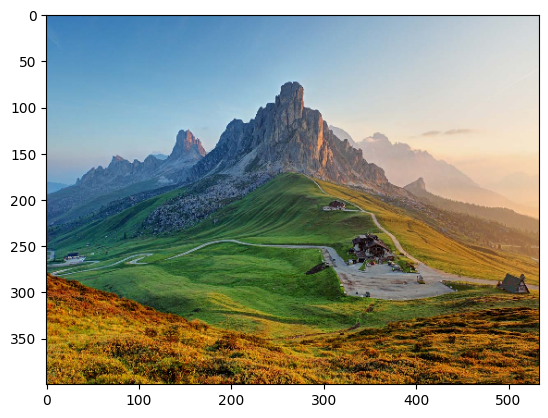

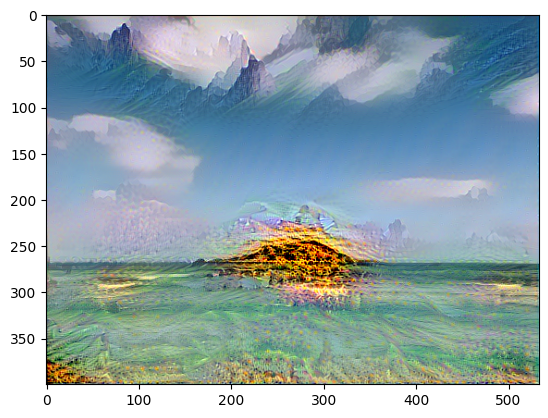

In [21]:
plt.imshow(load_img(target_image_path, target_size=(img_height, img_width)))
plt.figure()

plt.imshow(load_img(style_reference_image_path, target_size=(img_height, img_width)))
plt.figure()

plt.imshow(img)
plt.show()

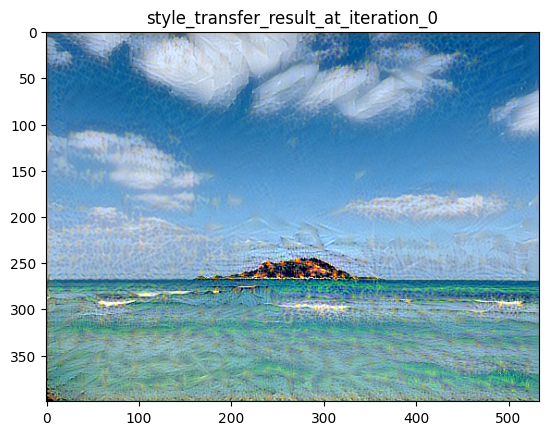

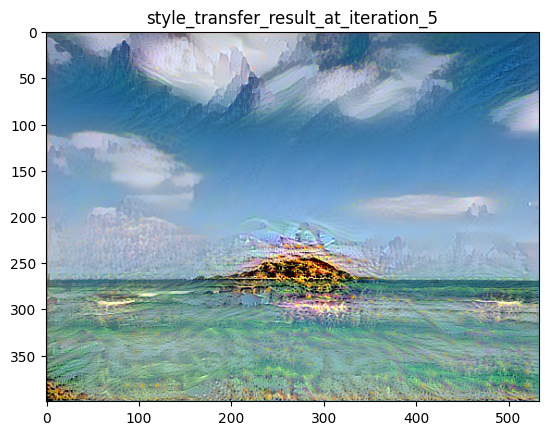

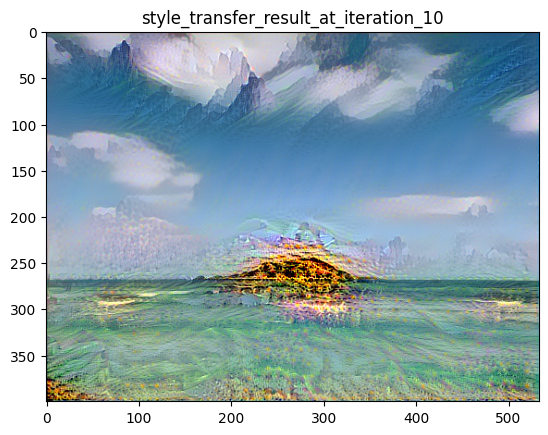

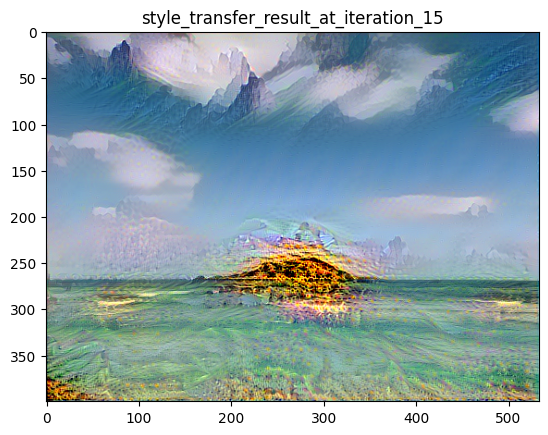

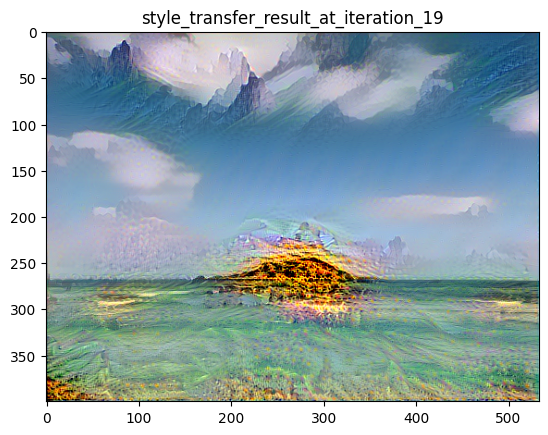

In [22]:
plt.imshow(load_img('./style_transfer_result_at_iteration_0.png'))
plt.title("style_transfer_result_at_iteration_0")
plt.show()

plt.imshow(load_img('./style_transfer_result_at_iteration_5.png'))
plt.title("style_transfer_result_at_iteration_5")
plt.show()

plt.imshow(load_img('./style_transfer_result_at_iteration_10.png'))
plt.title("style_transfer_result_at_iteration_10")
plt.show()

plt.imshow(load_img('./style_transfer_result_at_iteration_15.png'))
plt.title("style_transfer_result_at_iteration_15")
plt.show()

plt.imshow(load_img('./style_transfer_result_at_iteration_19.png'))
plt.title("style_transfer_result_at_iteration_19")
plt.show()